# Assignment 4

Welcome to the assignment for week 4.

To pass the assignment, you need to solve task 4.1 CAMSHIFT or 4.2 HOG. Solving both will unlock your BONUS point.

## Task 4: CAMSHIFT & HOG

### Task 4.1: CAMSHIFT

* Implement a function that creates a color histogram. Pass either an image and ROI, or the image underlying the ROI. 
* For this purpose, a second (or third) parameter can be passed to specify the number of bins. 
* Load the image "images/racecar.png" and convert the image to the HSV color space. Plot the Hue channel. (**RESULT**)

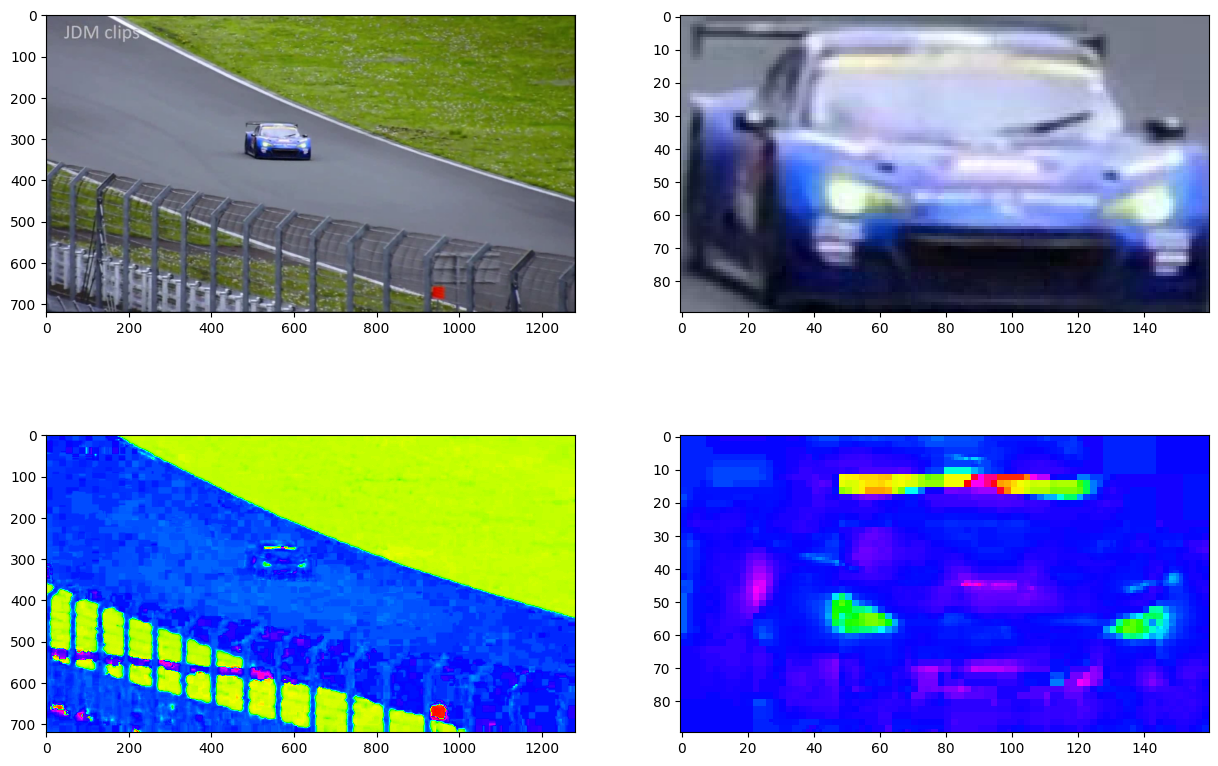

In [56]:
%matplotlib inline 
from skimage import io,color
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import warnings; warnings.simplefilter('ignore')


IMAGES_PER_ROW = 4

MIN_SATURATION_CAR = 0.2
MIN_VALUE_CAR = 0.5
MIN_SATURATION_TACO = 0.8
MIN_VALUE_TACO = 0.2

ROI_FRAME_MARGIN_CAR = 60
ROI_FRAME_MARGIN_TACO = 20


image = io.imread('images/racecar.png')
imageCar = image[260:350, 480:640]

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

ax1.imshow(image)
ax2.imshow(imageCar)
# hue channel
ax3.imshow(color.rgb2hsv(image)[:, :, 0], cmap='hsv')
ax4.imshow(color.rgb2hsv(imageCar)[:, :, 0], cmap='hsv')

* Display the histogram for the Hue channel for the entire image and for the RIO (x,y) = (480, 260) to (640, 350). Vary the number of bins for testing purposes (**RESULT**).

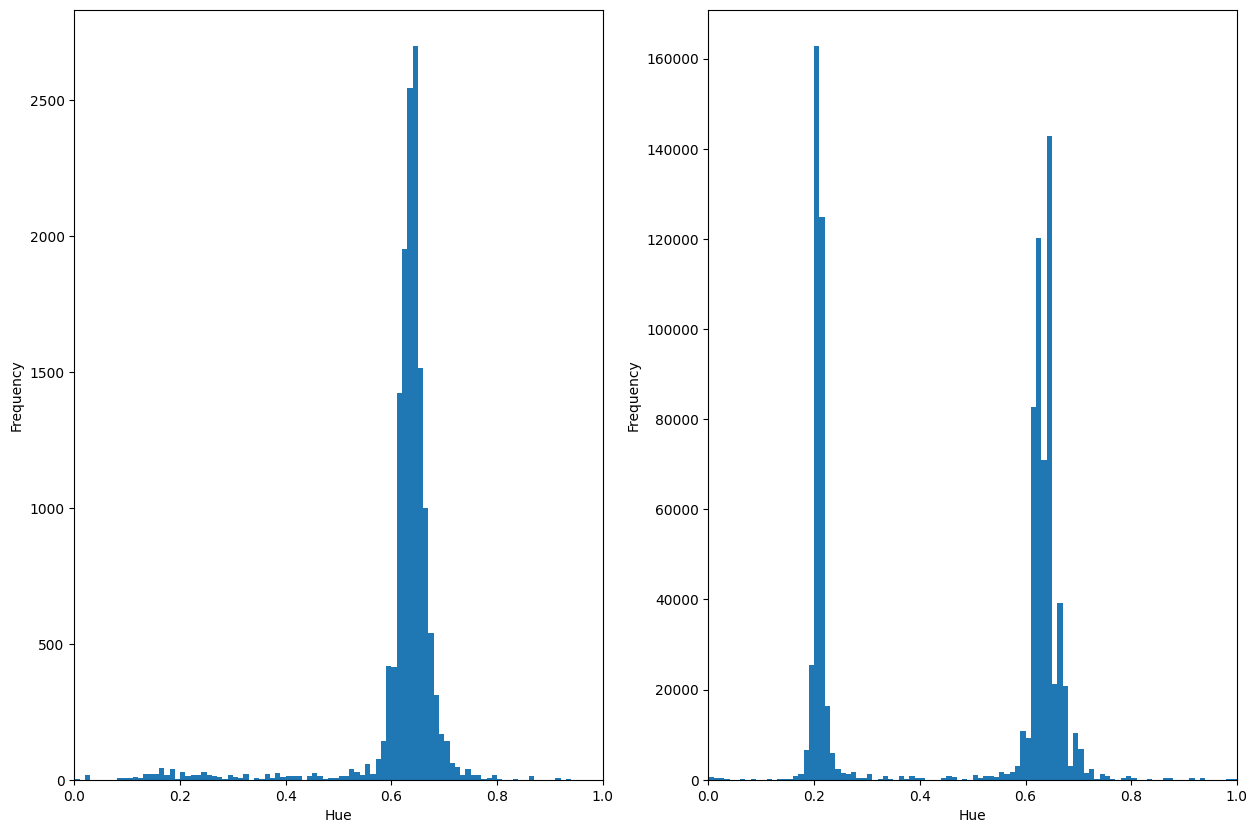

In [ ]:
def createColorHistogram(img, binCount = 256, out = None):
    hsv = color.rgb2hsv(img)
    hist, bins = np.histogram(hsv[:, :, 0].ravel(), bins=binCount, range=(0, 1))
    if out:
        bin_centers = (bins[:-1] + bins[1:]) / 2
        out.bar(bin_centers, hist, width=1/binCount, align='center')
        out.set_xlim(0, 1)
        out.set_xlabel('Hue')
        out.set_ylabel('Frequency')
    return hist

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# 100 is much better than 10
histCar100 = createColorHistogram(imageCar, 100, ax1)
histCar100 = createColorHistogram(image, 100, ax2)

* Implement the method outlined in the CAMSHIFT paper to create a probability distribution for a given object's hue histogram
* Create the histogram of the car from the image "racecar.png" and apply the new function to the last frame of the video (images/racecar/151.jpg) (**RESULT**)

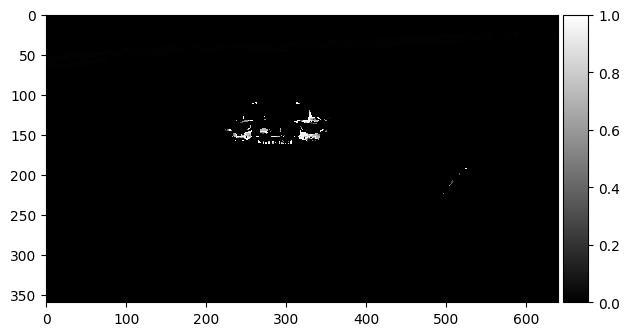

In [74]:
def createProbDistribution(image, objectHist, nbins, minSaturation, minValue):
    hsv = color.rgb2hsv(image)
    hues = hsv[:, :, 0]*(hsv[:, :, 1] >= minSaturation)*(hsv[:, :, 2] >= minValue)
    probDistr = np.zeros_like(hues)
    norm = np.max(objectHist)
    for (y,x), hue in np.ndenumerate(hues):
        if hue:
            probDistr[y,x] = objectHist[int(hue*(nbins-1))]/norm
    return probDistr

nbins = 100        
lastFrame = io.imread('images/racecar/151.jpeg')
histogramCar = createColorHistogram(imageCar, nbins, ax1)
probDistr = createProbDistribution(lastFrame, histogramCar, nbins, MIN_SATURATION_CAR+0.1, MIN_VALUE_CAR)
io.imshow(probDistr, cmap='gray')

 * Show ROI in image!

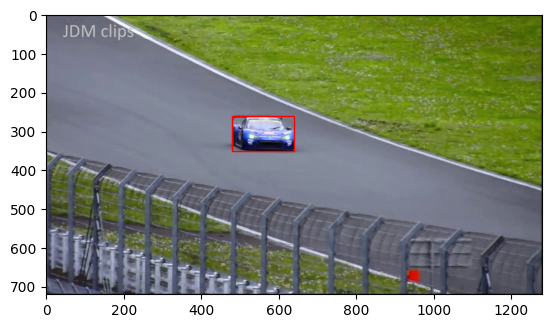

In [75]:
def drawROI(image, x, y, width, height, out = plt):
    currentAxis = plt.gca()
    currentAxis.add_patch(
        patches.Rectangle(
            (x, y),
            width,
            height,
            fill=False,
            edgecolor="red"
        )
    )
    
    out.imshow(image)

drawROI(image, 480, 260, 160, 90)

### Task 4.1.1 - Mean Shift
* Implement the Mean Shift method for a ROI as described in the lecture. Test the algorithm on the image sequences "images/racecar/*.jpg" or "images/taco/*.jpg". Select the appropriate tracking window (to reduce the file size I have reduced the images by a factor of 2, i.e. the ROI from above must be adjusted accordingly). 
* Draw the trajectory of the objects as returned by Mean Shift. (**RESULT**)

In [76]:
import scipy.stats

def mean_shift(images, initial_roi, nbins, min_sat, min_val):
    roi = x, y, width, height = initial_roi
    hist = createColorHistogram(images[0][y:y+height][x:x+width], nbins)
    rois = [roi]
    for _, image in enumerate(images):
        probDistr = createProbDistribution(image, hist, nbins, min_sat, min_val)
        m_00 = np.sum(probDistr)
        m_10 = np.sum(scipy.stats.moment(probDistr))
        m_01 = np.sum(scipy.stats.moment(probDistr, axis = 1))
        print(m_00, m_10, m_01)
        center_of_mass = (
            m_10/m_00, 
            m_01/m_00
        )
        roi = (
            int(center_of_mass[1] - height/2),
            int(center_of_mass[0] - width/2),
            width,
            height
        )
        rois.append(roi)
    return rois

images = io.imread_collection("images/racecar/*.jpeg")
# drawROI(images[0], *(235, 125, 80, 50))
mean_shift(images, (235, 125, 80, 50), 100, MIN_SATURATION_CAR, MIN_VALUE_CAR)

nan nan nan


ValueError: cannot convert float NaN to integer

###  Task 4.1.2 - CAMSHIFT
* Extend your algorithm by adjusting the size of the ROI and finding the object's orientation
* Execute the algorithm again on one of the image sequences and draw an ellipse on the image, which represents the found parameters (**RESULT**)

In [ ]:
# code here

### Task 4.2: Histogram of Oriented Gradients (HOG)

* Gradients and directions: First, implement the extraction of the gradient via convolution with the Sobel kernels. Translate the two result matrices into an image containing the gradient direction (one angle per pixel). Display this image for each of the three input images above. Like it fancy? Add transparency inversely proportional to the gradient magnitude (weak gradients are transparent). 

In [ ]:
pers1 = io.imread('images/per00002.ppm')
pers2 = io.imread('images/per00007.ppm')
pers3 = io.imread('images/per00014.ppm')

fig = plt.figure()
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(pers1)
ax2.imshow(pers2)
ax3.imshow(pers3)

In [ ]:
# code here

### Task 4.2.1 Gradient orientation histograms (GOHs)

Now implement a function that generates GOHs on image cells. Pass a gradient direction image (as described above) to the function. The image cells should be 8 x 8 pixels in size. Please do not forget the voting with "bi-linear interpolation" (important!). Compute the GOH for the input image "star.png" with and without interpolation! Now rotate the image by -5° and compute both variants of the GOH again! What are the Euclidean differences of the histograms (original vs rotated) with and without interpolation? (**RESULT**)

In [ ]:
# code here

### Task 4.2.2 Block and ROI normalization and creation of the HOG descriptor
* Given a fixed size ROI (128 x 64 pixels), create a descriptor as shown in the lecture (including normalization of the blocks and the total ROI). Please reuse the precalculated cell histograms for the blocks! 
* Calculate the descriptor for the three images above and for the unknown images "unknown1.png" and "unknown2.png". 
* Now compare the unknowns with the three person instances and calculate the Euclidean distance of the descriptors. Which picture has a smaller distance to the persons? (**RESULT**)

In [ ]:
# code here

## Congratz, you made it! :)